In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [7]:
data = pd.read_excel(r"D:\DATA ANALYTICS\Python\dataset\practice_data.xlsx")
df = pd.DataFrame(data)
df.head()

,EmployeeID,gender,department,Days Present,Accuracy of Work,Meeting Project Deadlines,Task Completion Rates,Interpersonal Skills Rating,Decision-Making Skills Rating,Sales Revenue Generated,churned
0,1,Male,Sales,20,High,Yes,85,8,7,51638,No
1,2,Female,Marketing,22,Medium,Yes,90,7,6,97797,Yes
2,3,Male,Human Resources,25,High,No,80,9,8,95341,No
3,4,Male,Engineering,19,Low,Yes,75,6,5,91806,No
4,5,Female,Finance,23,Medium,Yes,85,7,7,64247,Yes


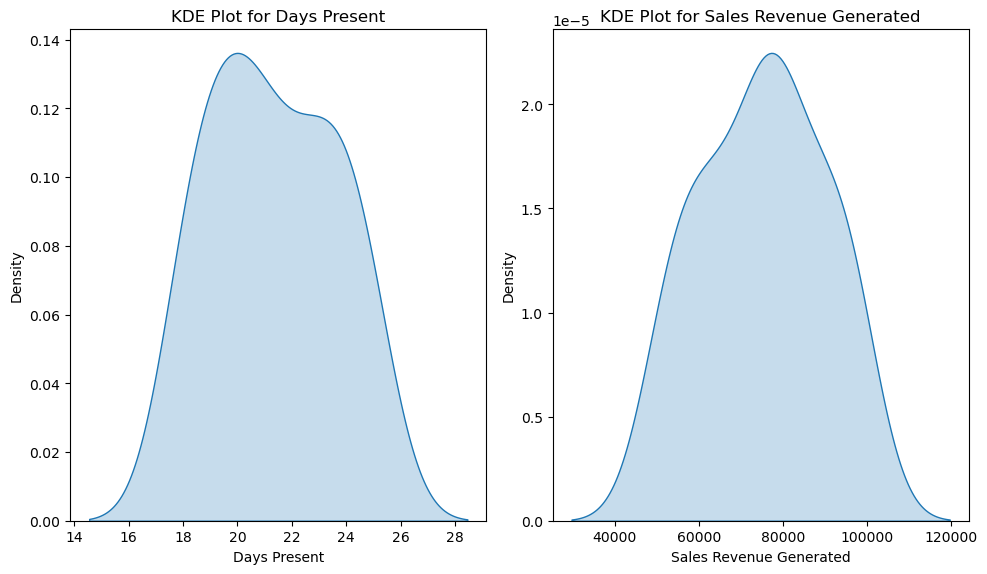

In [13]:
numeric_columns = [ 'Days Present','Sales Revenue Generated']
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
axes = axes.flatten()  # Flatten to 1D array for easy indexing

# Plot KDEs
for index, column in enumerate(numeric_columns):
    sns.kdeplot(df[column], ax=axes[index],fill =True)
    axes[index].set_title(f'KDE Plot for {column}')

plt.tight_layout()
plt.show()

In [19]:
sales_range = df["Sales Revenue Generated"].max() 
print("Range of Sales Revenue Generated:", sales_range)


Range of Sales Revenue Generated: 97797


In [48]:
from scipy.stats import boxcox

(<Axes: xlabel='Task Completion Rates_yeojohnson', ylabel='Density'>,
 0.3473060133855176)

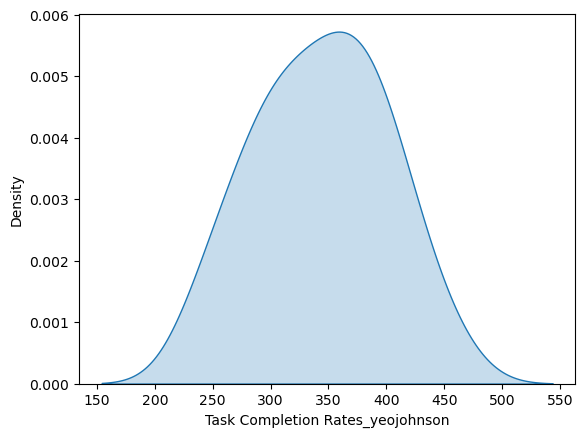

In [52]:
from scipy.stats import boxcox
def boxcox_transformation(data, column_name):
    transformed_data, _ = boxcox(data[column_name])
    data[f'{column_name}_boxcox'] = transformed_data
    stat, p_value = shapiro(data[f'{column_name}_boxcox'])
    kdeplot = sns.kdeplot(data[f'{column_name}_boxcox'])
    return(kdeplot,p_value)

A =pd.read_excel(r"D:\DATA ANALYTICS\Python\dataset\practice_data.xlsx")

yeojohnson_transformation(A,"Task Completion Rates")

In [40]:
from scipy.stats import yeojohnson
from scipy.stats import shapiro

(<Axes: xlabel='Task Completion Rates_yeojohnson', ylabel='Density'>,
 0.3473060133855176)

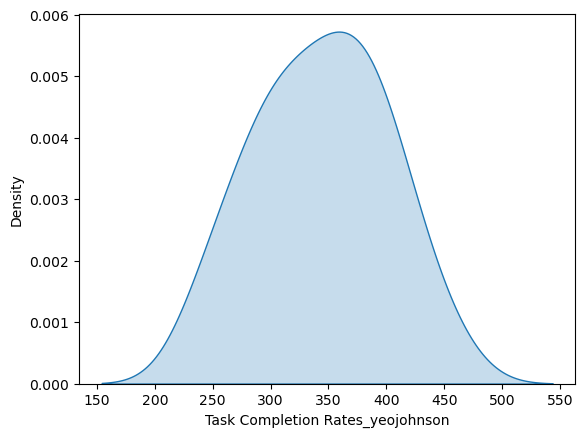

In [46]:
def yeojohnson_transformation(data, column_name):
    transformed_data, _ = yeojohnson(data[column_name])
    data[f'{column_name}_yeojohnson'] = transformed_data
    stat, p_value = shapiro(data[f'{column_name}_yeojohnson'])
    kdeplot = sns.kdeplot(data[f'{column_name}_yeojohnson'],fill=True)
    return(kdeplot,p_value)
    
A =pd.read_excel(r"D:\DATA ANALYTICS\Python\dataset\practice_data.xlsx")

yeojohnson_transformation(A,"Task Completion Rates")

In [58]:
from scipy import stats
hypothesis_mean = 68
t_statistic, p_value = stats.ttest_1samp(A["Interpersonal Skills Rating"],hypothesis_mean)
print("P-value",p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between the average Interpersonal Skills Rating and 68.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the average Interpersonal Skills Rating and 68.")

P-value 1.0318380146847296e-52
Reject the null hypothesis. There is a significant difference between the average Interpersonal Skills Rating and 68.


In [86]:
from scipy import stats
churned = A.query('churned == "Yes"')['Sales Revenue Generated']
existing = A.query('churned == "No"')['Sales Revenue Generated']
t_statistic, p_value = stats.ttest_ind(churned, existing)
print("P-value:", p_value)

alpha = 0.05 
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in average purchase amount between churned and existing customers.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in average purchase amount between churned and existing customers.")

P-value: 0.5653556952507652
Fail to reject the null hypothesis. There is no significant difference in average purchase amount between churned and existing customers.


In [108]:
High = df.query('`Accuracy of Work` == "High"')['Task Completion Rates']
Medium = df.query('`Accuracy of Work` == "Medium"')['Task Completion Rates']
Low = df.query('`Accuracy of Work` == "Low"')['Task Completion Rates']

t_staisics ,p_value = stats.f_oneway(High,Medium,Low )
print("P-value:", p_value)

alpha = 0.05 
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in average frequency of purchases among the customers from different cities.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in average frequency of purchases among the customers from different cities.")


P-value: 9.019029484966771e-06
Reject the null hypothesis. There is a significant difference in average frequency of purchases among the customers from different cities.
